# 1. Introduction: Visualizations

In [1]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 7.4 MB/s 
     |████████████████████████████████| 6.3 MB 47.9 MB/s 
     |████████████████████████████████| 16.7 MB 194 kB/s 


In [2]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import math

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dfchicago = pd.read_csv('/content/drive/MyDrive/thesis/data/cleaned/chicago_201907.csv', index_col=0).reset_index(drop=True)
dfnyc = pd.read_csv('/content/drive/MyDrive/thesis/data/cleaned/nyc_201907.csv', index_col=0).reset_index(drop=True)
dfdc = pd.read_csv('/content/drive/MyDrive/thesis/data/cleaned/DC_201907.csv', index_col=0).reset_index(drop=True)
dfboston = pd.read_csv('/content/drive/MyDrive/thesis/data/cleaned/boston_201907.csv', index_col=0).reset_index(drop=True)
dfphilly = pd.read_csv('/content/drive/MyDrive/thesis/data/cleaned/philly_201907.csv', index_col=0).reset_index(drop=True)
dfportland = pd.read_csv('/content/drive/MyDrive/thesis/data/cleaned/portland_201907.csv', index_col=0).reset_index(drop=True)
dfpittsburgh = pd.read_csv('/content/drive/MyDrive/thesis/data/cleaned/pittsburgh_201907.csv', index_col=0).reset_index(drop=True)
dfcolumbus = pd.read_csv('/content/drive/MyDrive/thesis/data/cleaned/columbus_201907.csv', index_col=0).reset_index(drop=True)

In [5]:
# NYC data is too large
dfnyc = dfnyc.sample(n = 500000).reset_index(drop=True)

In [6]:
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [7]:
chicago_map = gpd.read_file('/content/drive/MyDrive/thesis/shapes/chicago_shape/geo_export_5b3e5afc-0ab5-44be-8d71-c5765b825b48.shp')
boston_map = gpd.read_file('/content/drive/MyDrive/thesis/shapes/boston_shape/Boston_Neighborhoods.shp')
nyc_map = gpd.read_file('/content/drive/MyDrive/thesis/shapes/nyc_shape/geo_export_324bde50-4600-4a30-b3bc-b551de881e16.shp')
dc_map = gpd.read_file('/content/drive/MyDrive/thesis/shapes/dc_shape/Census_Tracts_in_2020.shp')
philly_map = gpd.read_file('/content/drive/MyDrive/thesis/shapes/philly_shape/philly.shp')
portland_map = gpd.read_file('/content/drive/MyDrive/thesis/shapes/portland_shape/portland.shp')
pittsburgh_map = gpd.read_file('/content/drive/MyDrive/thesis/shapes/pittsburgh_shape/Neighborhoods_.shp')
columbus_map = gpd.read_file('/content/drive/MyDrive/thesis/shapes/columbus_shape/columbus.shp')

In [8]:
def get_station2coord(df):
  '''Get a dictionary of station names and coordinates'''
  station2coord = {}
  for i in df.index:
    start_loc = df.loc[i, 'start_loc']
    start_station_name = df.loc[i, 'start_name']
    end_loc = df.loc[i, 'end_loc']
    end_station_name = df.loc[i, 'end_name']
    if start_station_name not in station2coord:
      station2coord[start_station_name] = start_loc
    if end_station_name not in station2coord:
      station2coord[end_station_name] = end_loc 
  return station2coord

In [9]:
def get_G(df):
  '''return the NetworkX Graph.'''
  trips = []
  for i in df.index:
    trips.append(tuple([df.loc[i, 'start_name'], df.loc[i, 'end_name']]))
  trips = pd.Series(trips)
  trip_counts = trips.value_counts()
  # record the number of trips between each start station and end station as edge weight
  edge_weights = []
  for i in range(len(trip_counts)):
    edge_weights.append(tuple([trip_counts.index[i][0], trip_counts.index[i][1], trip_counts[i]]))
  DG = nx.DiGraph()
  DG.add_weighted_edges_from(edge_weights)
  G = nx.Graph(DG)
  return G

In [10]:
def master_figures(df, city_name, city_map, xlim=0, ylim=0, weight_adjustment=100, n_size=16, node_color = '#3DB7E4'):
  # combine the latitude and longitude of each bike station
  df['start_loc'] = df['start_lat'].map(lambda x: str(x)[:9]) + ',' + df['start_long'].map(lambda x: str(x)[:10])
  df['end_loc'] = df['end_lat'].map(lambda x: str(x)[:9]) + ',' + df['end_long'].map(lambda x: str(x)[:10])

  station2coord = get_station2coord(df)
  G = get_G(df)
  # record the position coordinates of each node (station) using the station2coord dictionary
  pos = {}
  for i in range(len(G.nodes)):
    coord = station2coord[list(G.nodes)[i]].split(',')
    pos[list(G.nodes)[i]] = (float(coord[1]), float(coord[0]))
  nx.set_node_attributes(G, pos, 'coord')

  # adjust the width of edges in the graph
  weights = [math.log(G[u][v]['weight'])/weight_adjustment for u,v in G.edges]

  #plot the network graph
  fig, ax = plt.subplots(figsize = (14, 14))
  nx.draw_networkx_nodes(G, pos, node_size=n_size,node_color= node_color, node_shape="o", alpha=1)
  nx.draw_networkx_edges(G, pos, width = weights, edge_color='#52464A')
  city_map.plot(ax = ax, facecolor="none", 
              edgecolor='black', lw=1)
  if xlim != 0:
    ax.set_xlim(xlim)
  if ylim != 0:
    ax.set_ylim(ylim)
  #nx.draw_networkx_labels(G, pos, font_size=4)
  plt.savefig(f'/content/drive/MyDrive/thesis/figures/{city_name}.png', dpi=150, bbox_inches='tight')

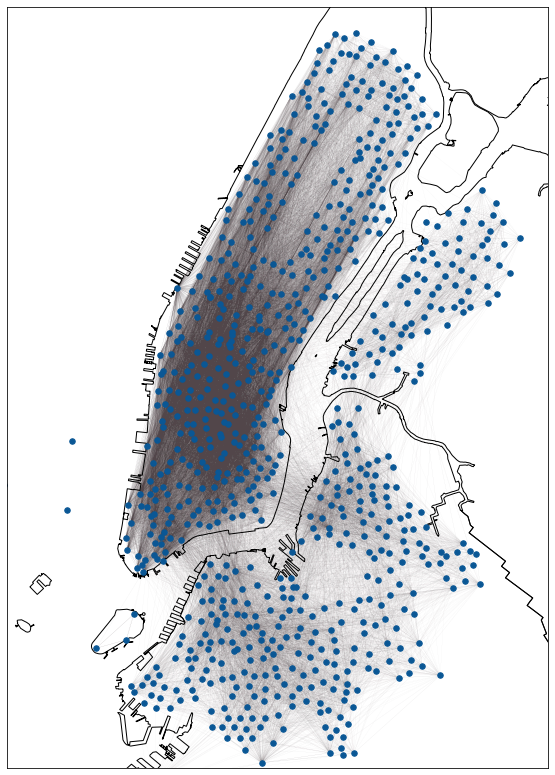

In [11]:
xlim = (-74.05, -73.9)
ylim = (40.66, 40.82)
master_figures(dfnyc, 'nyc', nyc_map, xlim, ylim, 60, 30,'#0A5795')

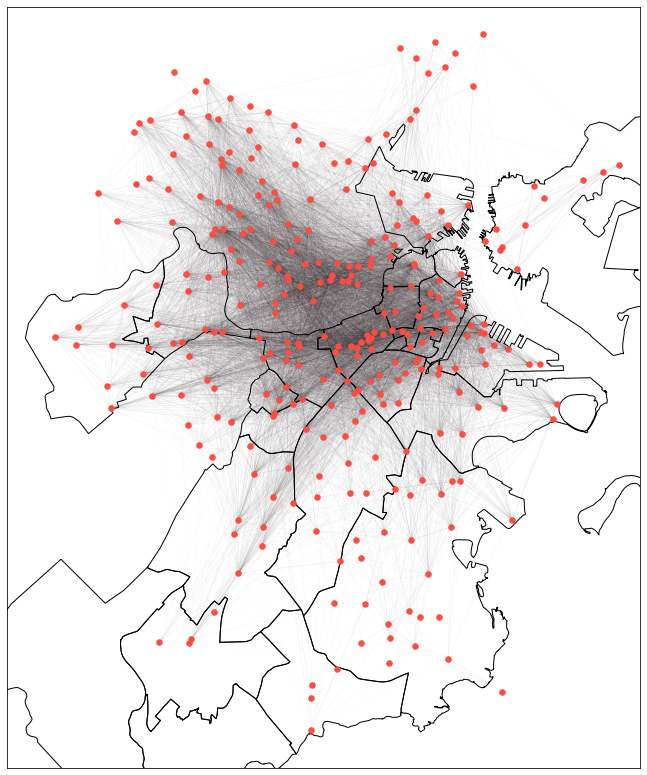

In [12]:
xlim = (-71.18, -71.0)
ylim = (42.26, 42.42)
master_figures(dfboston, 'boston', boston_map, xlim, ylim, 60, 30, '#FB4E42')

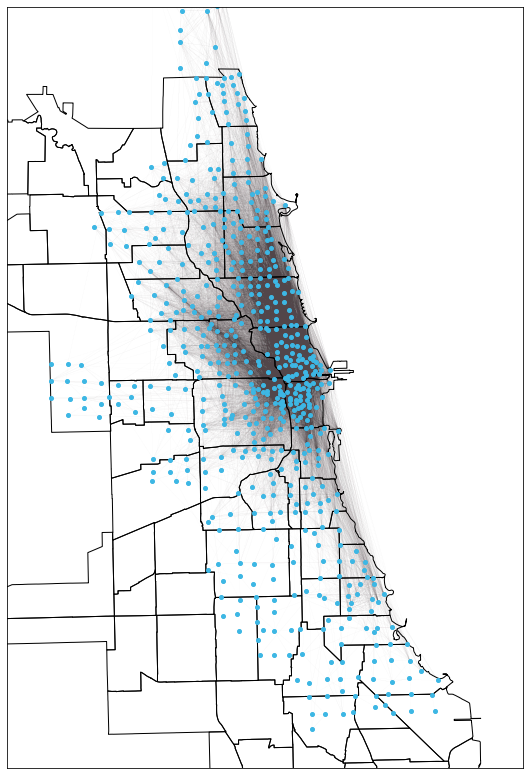

In [ ]:
xlim = (-87.8, -87.5)
ylim = (41.72, 42.05)
master_figures(dfchicago, 'chicago', chicago_map, xlim, ylim)

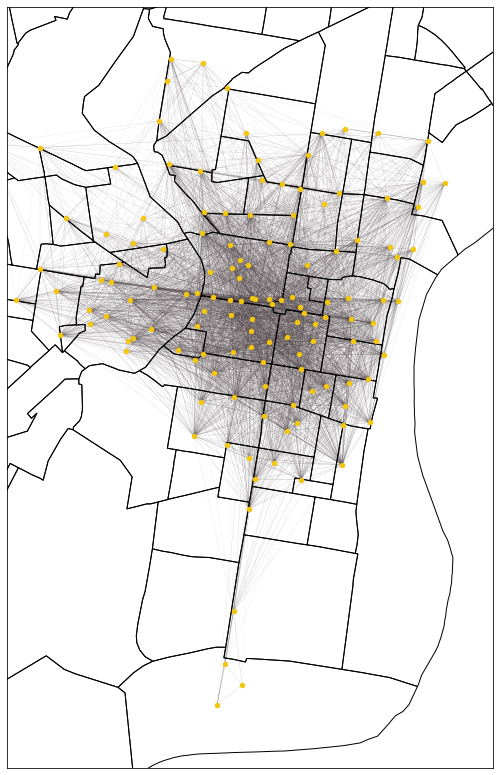

In [13]:
xlim = (-75.22, -75.12)
ylim = (39.88, 40.00)
master_figures(dfphilly, 'philly', philly_map, xlim, ylim, 20, 20, '#F3C610')

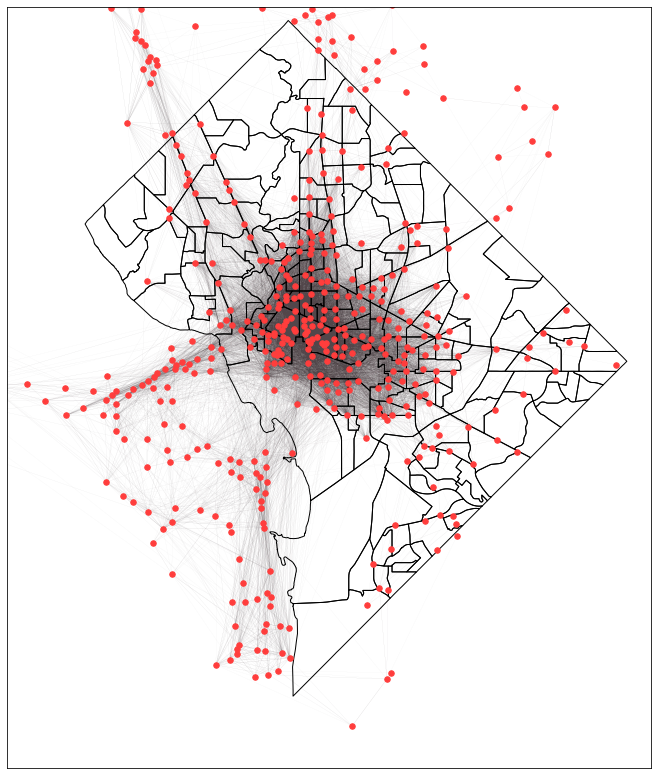

In [14]:
xlim = (-77.15, -76.9)
ylim = (38.77, 39)
master_figures(dfdc, 'DC', dc_map, xlim, ylim, 50, 30, '#FF3D3C')

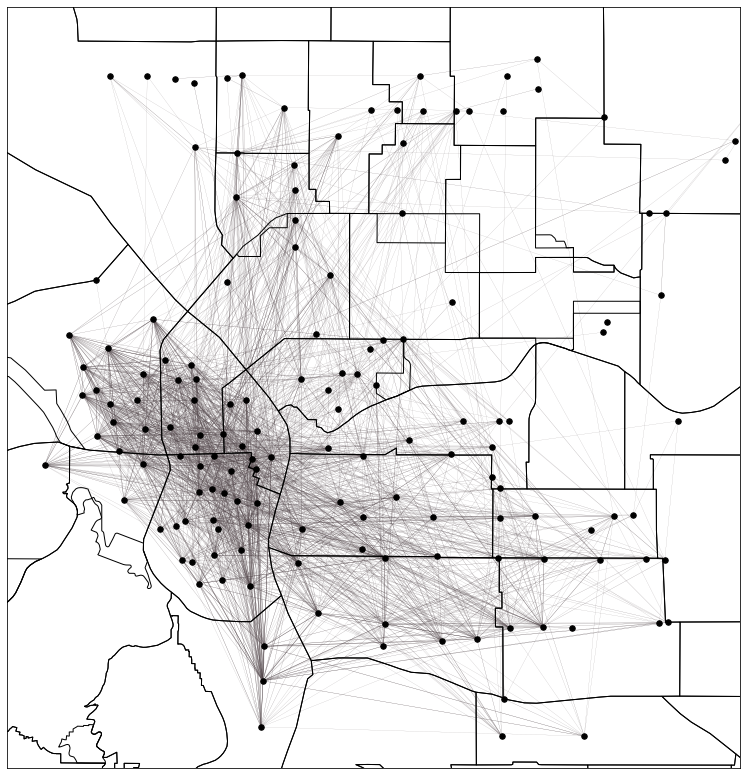

In [15]:
xlim = (-122.71, -122.6)
ylim = (45.49, 45.57)
master_figures(dfportland, 'portland',portland_map, xlim, ylim, 8, 30, '#000000')

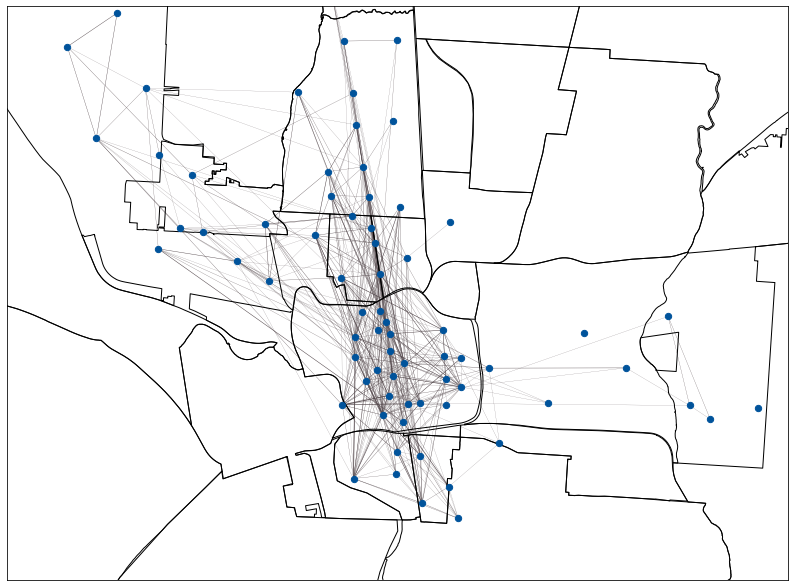

In [16]:
xlim = (-83.08, -82.92)
ylim = (39.93, 40.02)
master_figures(dfcolumbus, 'columbus', columbus_map, xlim, ylim, 5, 40, '#00539B')

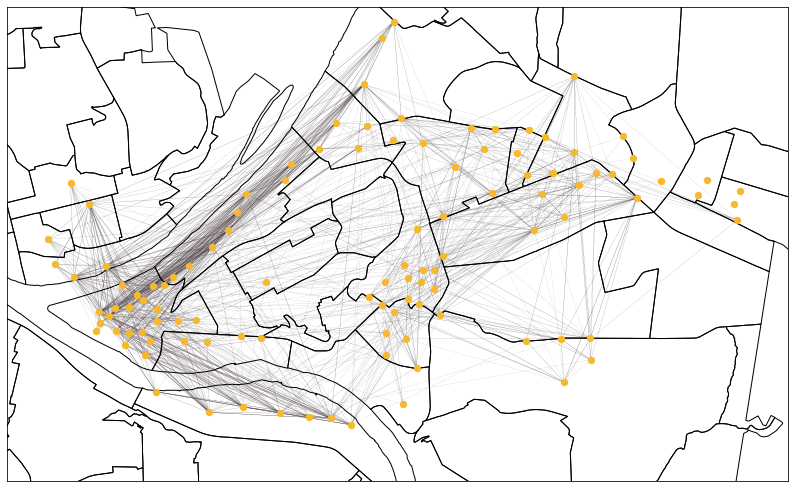

In [17]:
xlim = (-80.02, -79.89)
ylim = (40.42, 40.48)
master_figures(dfpittsburgh, 'pittsburgh', pittsburgh_map, xlim, ylim, 10, 40, '#F6B92C')